In [45]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
import seaborn as sns

sns.set_context(rc={'figure.figsize': (14, 7) } )
figzize_me = figsize =(14, 7)

In [46]:
import pandas as pd
import numpy as np
from abupy import AbuML

data = pd.read_csv("./data/shop/Bossapp_ouput(1519231160.9475799).csv")
data.info()
data.sample(n=5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 29 columns):
company_name               186 non-null object
area                       186 non-null object
profit                     186 non-null int64
rent                       186 non-null int64
total_price                186 non-null int64
size                       186 non-null int64
Latlng                     186 non-null object
parking_count              186 non-null int64
subway_station_count       186 non-null int64
bus_station_count          186 non-null int64
school_count               186 non-null int64
restaurant_count           186 non-null int64
bakery_count               186 non-null int64
movie_theater_count        186 non-null int64
park_count                 186 non-null int64
convenience_store_count    186 non-null int64
department_store_count     186 non-null int64
supermarket_count          186 non-null int64
parking                    117 non-null float64
subway_station  

,company_name,area,profit,rent,total_price,size,Latlng,parking_count,subway_station_count,bus_station_count,...,subway_station,bus_station,school,restaurant,bakery,movie_theater,park,convenience_store,department_store,supermarket
37,包餃店,長沙灣,26000,28000,350000,150,"49.1647086,-123.1345376",1,0,7,...,NaN,26.0,178.0,0.0,171.0,NaN,NaN,NaN,NaN,35.0
97,麒麟小食,天后,-49420,45000,180000,200,null,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,滙源點心專門店,長沙灣,38400,28000,200000,100,null,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85,Kbites,堅尼地城,60050,34000,180000,450,null,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,喵Sing人,旺角,41000,33000,350000,100,null,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
#nullRowCheck
nullRow = data.isnull().sum(1)
nr = pd.DataFrame(nullRow)
nridx = []
#print(nr)
for row in range(data.shape[0]):
    if(nullRow[row]/data.shape[1]>0.3):
        #print("Row ", row," has ", nullRow[row], " NaN values.")
        nridx.append(data.index[row])
data = data.drop(data.index[nridx])
data.index = range(data.shape[0])
print("Del rows: ",nridx)
print(data.index)
print("Row of data is: ", data.shape[0])

Del rows:  [1, 4, 7, 10, 18, 22, 24, 28, 30, 33, 40, 42, 50, 52, 54, 60, 61, 64, 66, 69, 73, 74, 76, 85, 86, 87, 89, 93, 96, 97, 100, 107, 109, 110, 111, 112, 114, 121, 122, 128, 130, 131, 136, 138, 139, 140, 143, 144, 151, 152, 155, 156, 159, 161, 166, 167, 168, 171, 174, 177, 181, 183, 184, 185]
RangeIndex(start=0, stop=122, step=1)
Row of data is:  122


In [48]:
#nullColumnCheck
nullCol = data.isnull().sum()
nc = pd.DataFrame(nullCol)
#print(nc.index.values)
#print(nc)
for col in range(data.shape[1]):
    if(nullCol[col]/data.shape[0]>0.5):
        print("Del cols: ",nc.index.values[col], nullCol[col])
        del data[nc.index.values[col]]        
    if(nc.index.values[col] == 'company_name'):
        print("Del cols: ",nc.index.values[col])
        del data[nc.index.values[col]]
    if(nc.index.values[col] == 'area'):
        print("Del cols: ",nc.index.values[col])
        del data[nc.index.values[col]]
    if(nc.index.values[col] == 'Latlng'):
        print("Del cols: ",nc.index.values[col])
        del data[nc.index.values[col]]
data.index = range(data.shape[0])
print("Col of data is: ", data.shape[1])

Del cols:  company_name
Del cols:  area
Del cols:  Latlng
Del cols:  subway_station 96
Del cols:  movie_theater 85
Del cols:  department_store 67
Col of data is:  23


In [49]:
data.head(5)

,profit,rent,total_price,size,parking_count,subway_station_count,bus_station_count,school_count,restaurant_count,bakery_count,...,department_store_count,supermarket_count,parking,bus_station,school,restaurant,bakery,park,convenience_store,supermarket
0,-30700,26000,360000,250,5,0,13,7,20,6,...,0,8,102.0,69.0,67.0,57.0,85.0,32.0,157.0,99.0
1,117500,44000,400000,120,1,0,6,5,20,5,...,0,4,164.0,175.0,256.0,10.0,20.0,NaN,19.0,247.0
2,40500,49000,228000,250,0,0,12,20,20,10,...,1,6,NaN,71.0,58.0,50.0,74.0,13.0,75.0,48.0
3,37220,77000,700000,300,11,0,4,7,20,4,...,6,3,51.0,176.0,82.0,27.0,67.0,121.0,24.0,4.0
4,52200,33000,188000,160,1,0,14,5,12,1,...,0,1,53.0,5.0,86.0,0.0,362.0,1289.0,366.0,34.0


In [50]:
#mean feature filling of x
data.fillna(data.mean(),inplace=True)
data.head(5)

,profit,rent,total_price,size,parking_count,subway_station_count,bus_station_count,school_count,restaurant_count,bakery_count,...,department_store_count,supermarket_count,parking,bus_station,school,restaurant,bakery,park,convenience_store,supermarket
0,-30700,26000,360000,250,5,0,13,7,20,6,...,0,8,102.0000,69.0,67.0,57.0,85.0,32.0000,157.0,99.0
1,117500,44000,400000,120,1,0,6,5,20,5,...,0,4,164.0000,175.0,256.0,10.0,20.0,169.5233,19.0,247.0
2,40500,49000,228000,250,0,0,12,20,20,10,...,1,6,121.0427,71.0,58.0,50.0,74.0,13.0000,75.0,48.0
3,37220,77000,700000,300,11,0,4,7,20,4,...,6,3,51.0000,176.0,82.0,27.0,67.0,121.0000,24.0,4.0
4,52200,33000,188000,160,1,0,14,5,12,1,...,0,1,53.0000,5.0,86.0,0.0,362.0,1289.0000,366.0,34.0


In [51]:
#seperate x and y
X = data.loc[:, data.columns != 'profit']
y = data.loc[:, data.columns == 'profit']
X = X.values
y = y.values

In [52]:
import tensorflow as tf
from sklearn.datasets import load_boston
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [53]:
#Seperate x and y
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
X_train

array([[  25000.    ,  150000.    ,     100.    , ...,     148.    ,
             31.    ,      48.    ],
       [  33000.    ,  500000.    ,     800.    , ...,     251.    ,
            328.    ,     358.    ],
       [  28500.    ,  200000.    ,     100.    , ...,     219.    ,
            118.    ,      65.    ],
       ..., 
       [   4000.    ,  258000.    ,     200.    , ...,     224.    ,
            109.6379,     115.4783],
       [  32000.    ,  285000.    ,     100.    , ...,     169.5233,
              7.    ,     115.4783],
       [  35000.    ,  350000.    ,     250.    , ...,     204.    ,
            174.    ,     167.    ]])

In [54]:
#Scale data
from sklearn.preprocessing import StandardScaler
"""
X_train = scale(X_train)
X_test = scale(X_test)
y_train = scale(y_train.reshape((-1,1)))
y_test = scale(y_test.reshape((-1,1)))
"""
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
y_train = scaler.fit_transform(y_train)
y_test = scaler.fit_transform(y_test)


In [55]:
#Polynomial Regression Approach
df = pd.DataFrame(data=np.c_[X_train, y_train], columns=np.append(data.columns[1:].values, ['profit']))
pr = AbuML(X_train, y_train, df)

PR of degree 1 :  -1.25422304378


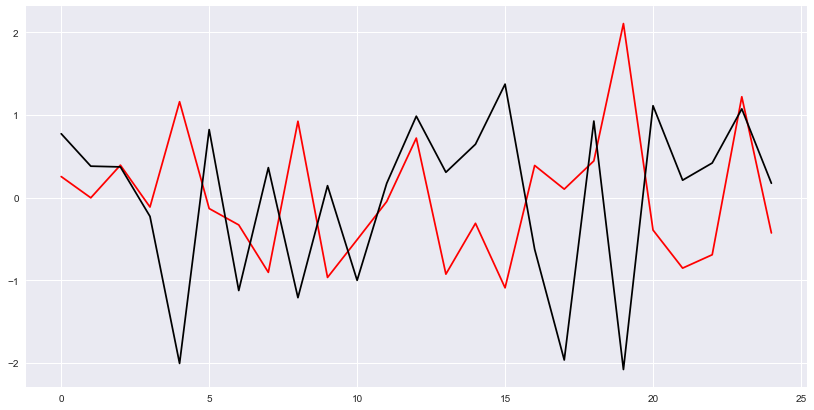

PR of degree 2 :  -3.78850701367


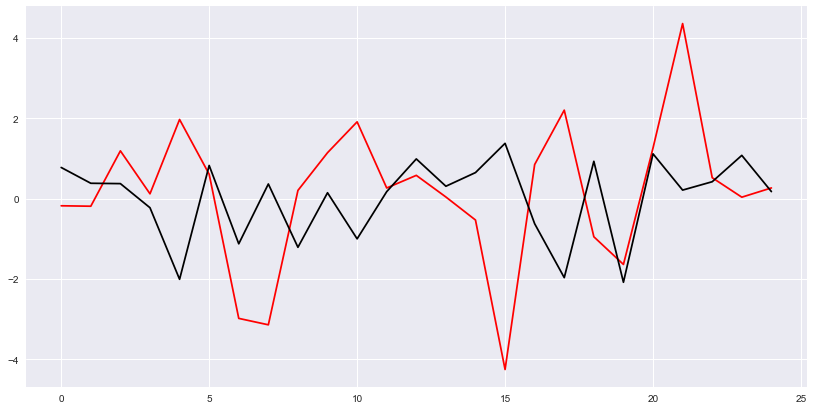

PR of degree 3 :  -3.89710541911


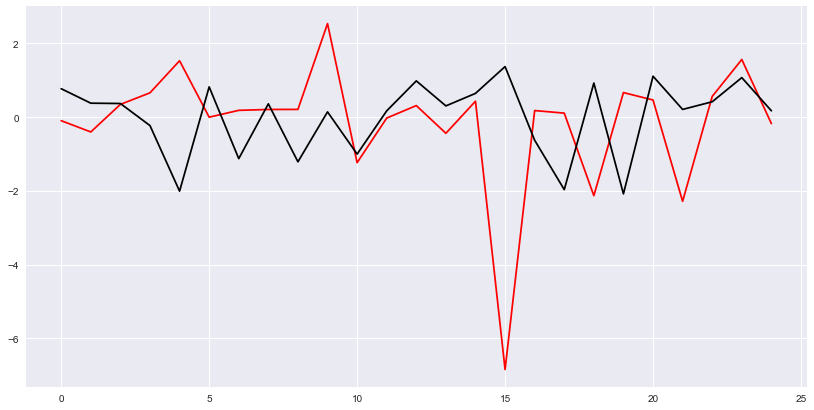

PR of degree 4 :  -1.16658039704


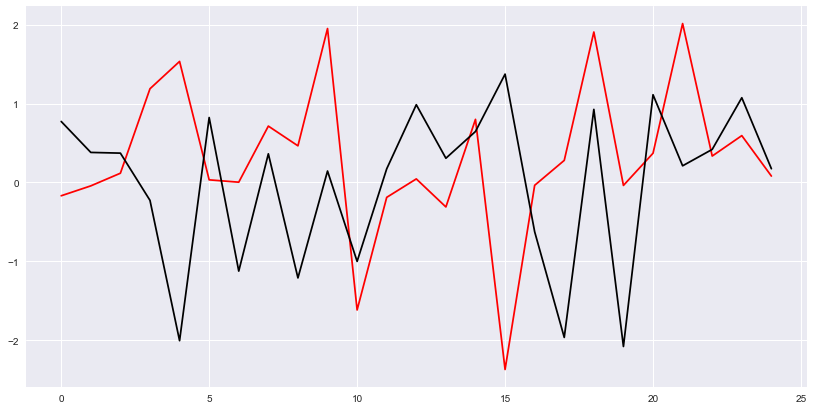

PR of degree 5 :  -7.13427870179


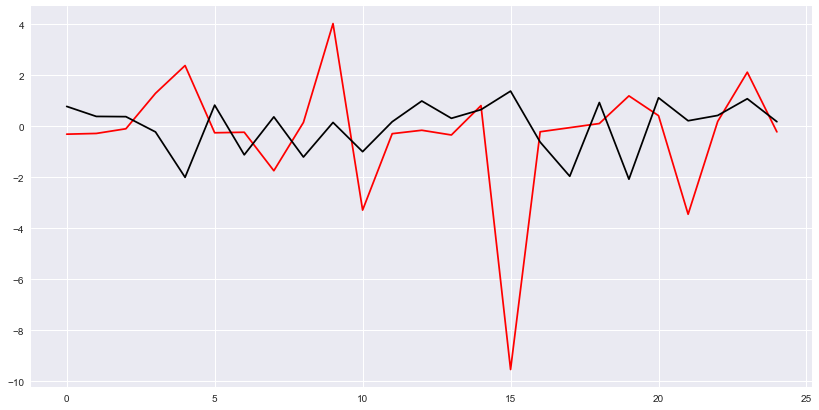

PR of degree 6 :  -12.5350097619


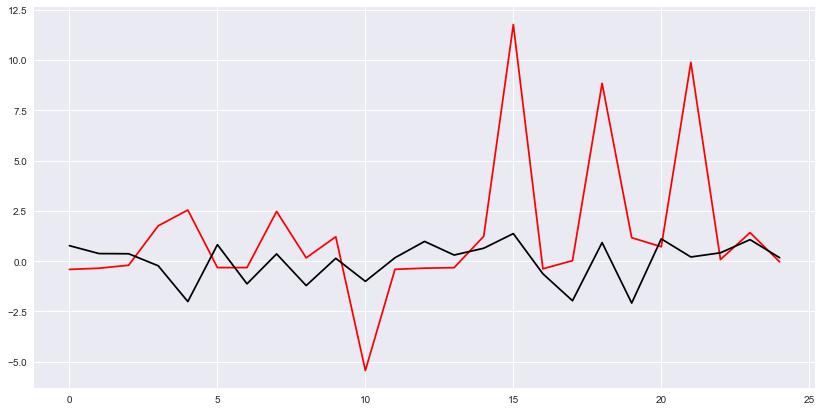

In [56]:
#Test degrees from 1 to 4
from sklearn.metrics import r2_score
import numpy as np
t = np.linspace(-50, 50)
for i in range(6):
    pr.estimator.polynomial_regression(degree=i+1)
    reg = pr.fit()
    y_pred = reg.predict(X_test)
    print("PR of degree",i+1,": ",r2_score(y_test, y_pred))
    plt.plot(y_pred,'r')
    plt.plot(y_test,'black')
    plt.show()

In [57]:
#Neural Network Approach
def add_layer(inputs,input_size,output_size,activation_function=None):
    with tf.variable_scope("Weights"):
        Weights = tf.Variable(tf.random_normal(shape=[input_size,output_size]),name="weights")
    with tf.variable_scope("biases"):
        biases = tf.Variable(tf.zeros(shape=[1,output_size]) + 0.1,name="biases")
    with tf.name_scope("Wx_plus_b"):
        Wx_plus_b = tf.matmul(inputs,Weights) + biases
    with tf.name_scope("dropout"):
        Wx_plus_b = tf.nn.dropout(Wx_plus_b,keep_prob=keep_prob_s)
    if activation_function is None:
        return Wx_plus_b
    else:
        with tf.name_scope("activation_function"):
            return activation_function(Wx_plus_b)

In [58]:
#Placeholders
xs = tf.placeholder(shape=[None,X_train.shape[1]],dtype=tf.float32,name="inputs")
ys = tf.placeholder(shape=[None,1],dtype=tf.float32,name="y_true")
keep_prob_s = tf.placeholder(dtype=tf.float32)

In [59]:
#Build neural network
with tf.name_scope("layer_1"):
    l1 = add_layer(xs,X_train.shape[1],10,activation_function=tf.nn.relu)
# with tf.name_scope("layer_2"):
#     l2 = add_layer(l1,6,10,activation_function=tf.nn.relu)
with tf.name_scope("y_pred"):
    pred = add_layer(l1,10,1)

#Save the operation of pred
pred = tf.add(pred, 0, name='pred')

In [60]:
#Loss definition
with tf.name_scope("loss"):
    # minimal squared error
    loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys - pred),reduction_indices=[1]))
    tf.summary.scalar("loss",tensor=loss)

In [61]:
#Model train
with tf.name_scope("train"):
    # train_op =tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(loss)
    train_op = tf.train.AdamOptimizer(learning_rate=0.01).minimize(loss)

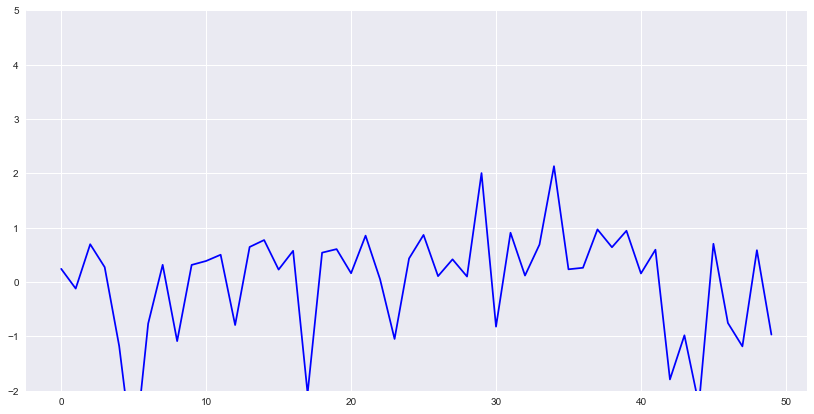

In [62]:
#Model visualization
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
#Show the first 50 elements
ax.plot(range(50),y_train[0:50],'b')
ax.set_ylim([-2,5])
plt.ion()
plt.show()

In [63]:
#Parameters
keep_prob = 1  #prevent overfitting,0.5-0.8,1 means no prevention
ITER = 1001

In [67]:
#Training
def fit(X, y, ax, n, keep_prob):
    init = tf.global_variables_initializer()
    feed_dict_train = {ys: y, xs: X, keep_prob_s: keep_prob}
    with tf.Session() as sess:
        saver = tf.train.Saver(tf.global_variables(), max_to_keep=15)
        merged = tf.summary.merge_all()
        #writer = tf.summary.FileWriter(logdir="nn_b4b_log", graph=sess.graph)
        sess.run(init)
        for i in range(n):
            _loss, _ = sess.run([loss, train_op], feed_dict=feed_dict_train)

            if i % 100 == 0:
                print("epoch:%d\tloss:%.5f" % (i, _loss))
                y_pred = sess.run(pred, feed_dict=feed_dict_train)
                rs = sess.run(merged, feed_dict=feed_dict_train)
                #Tensorbroad
                #writer.add_summary(summary=rs, global_step=i)  
                #Save model
                saver.save(sess=sess, save_path="Model/nn_b4b.model", global_step=i)
                plt.plot(y_pred,'r')
                plt.plot(y,'b')
                plt.show()
                try:
                    ax.lines.remove(lines[0])
                except:
                    pass

        saver.save(sess=sess, save_path="Model/nn_b4b.model", global_step=n)

In [68]:
fit(X=X_train,y=y_train,n=ITER,keep_prob=keep_prob,ax=ax)

epoch:0	loss:86.84528


InvalidArgumentError: You must feed a value for placeholder tensor 'inputs' with dtype float
	 [[Node: inputs = Placeholder[dtype=DT_FLOAT, shape=[], _device="/job:localhost/replica:0/task:0/gpu:0"]()]]
	 [[Node: loss_2/Mean/_31 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/cpu:0", send_device="/job:localhost/replica:0/task:0/gpu:0", send_device_incarnation=1, tensor_name="edge_74_loss_2/Mean", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/cpu:0"]()]]

Caused by op 'inputs', defined at:
  File "D:\WinPython-64bit-3.5.3.1Qt5\python-3.5.3.amd64\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "D:\WinPython-64bit-3.5.3.1Qt5\python-3.5.3.amd64\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "D:\WinPython-64bit-3.5.3.1Qt5\python-3.5.3.amd64\lib\site-packages\ipykernel\__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "D:\WinPython-64bit-3.5.3.1Qt5\python-3.5.3.amd64\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "D:\WinPython-64bit-3.5.3.1Qt5\python-3.5.3.amd64\lib\site-packages\ipykernel\kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().start()
  File "D:\WinPython-64bit-3.5.3.1Qt5\python-3.5.3.amd64\lib\site-packages\zmq\eventloop\ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "D:\WinPython-64bit-3.5.3.1Qt5\python-3.5.3.amd64\lib\site-packages\tornado\ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "D:\WinPython-64bit-3.5.3.1Qt5\python-3.5.3.amd64\lib\site-packages\tornado\stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "D:\WinPython-64bit-3.5.3.1Qt5\python-3.5.3.amd64\lib\site-packages\zmq\eventloop\zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "D:\WinPython-64bit-3.5.3.1Qt5\python-3.5.3.amd64\lib\site-packages\zmq\eventloop\zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "D:\WinPython-64bit-3.5.3.1Qt5\python-3.5.3.amd64\lib\site-packages\zmq\eventloop\zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "D:\WinPython-64bit-3.5.3.1Qt5\python-3.5.3.amd64\lib\site-packages\tornado\stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "D:\WinPython-64bit-3.5.3.1Qt5\python-3.5.3.amd64\lib\site-packages\ipykernel\kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "D:\WinPython-64bit-3.5.3.1Qt5\python-3.5.3.amd64\lib\site-packages\ipykernel\kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "D:\WinPython-64bit-3.5.3.1Qt5\python-3.5.3.amd64\lib\site-packages\ipykernel\kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "D:\WinPython-64bit-3.5.3.1Qt5\python-3.5.3.amd64\lib\site-packages\ipykernel\ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "D:\WinPython-64bit-3.5.3.1Qt5\python-3.5.3.amd64\lib\site-packages\ipykernel\zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "D:\WinPython-64bit-3.5.3.1Qt5\python-3.5.3.amd64\lib\site-packages\IPython\core\interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "D:\WinPython-64bit-3.5.3.1Qt5\python-3.5.3.amd64\lib\site-packages\IPython\core\interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "D:\WinPython-64bit-3.5.3.1Qt5\python-3.5.3.amd64\lib\site-packages\IPython\core\interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-14-e86356059d6e>", line 2, in <module>
    xs = tf.placeholder(shape=[None,X_train.shape[1]],dtype=tf.float32,name="inputs")
  File "D:\WinPython-64bit-3.5.3.1Qt5\python-3.5.3.amd64\lib\site-packages\tensorflow\python\ops\array_ops.py", line 1507, in placeholder
    name=name)
  File "D:\WinPython-64bit-3.5.3.1Qt5\python-3.5.3.amd64\lib\site-packages\tensorflow\python\ops\gen_array_ops.py", line 1997, in _placeholder
    name=name)
  File "D:\WinPython-64bit-3.5.3.1Qt5\python-3.5.3.amd64\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 768, in apply_op
    op_def=op_def)
  File "D:\WinPython-64bit-3.5.3.1Qt5\python-3.5.3.amd64\lib\site-packages\tensorflow\python\framework\ops.py", line 2336, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "D:\WinPython-64bit-3.5.3.1Qt5\python-3.5.3.amd64\lib\site-packages\tensorflow\python\framework\ops.py", line 1228, in __init__
    self._traceback = _extract_stack()

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'inputs' with dtype float
	 [[Node: inputs = Placeholder[dtype=DT_FLOAT, shape=[], _device="/job:localhost/replica:0/task:0/gpu:0"]()]]
	 [[Node: loss_2/Mean/_31 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/cpu:0", send_device="/job:localhost/replica:0/task:0/gpu:0", send_device_incarnation=1, tensor_name="edge_74_loss_2/Mean", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/cpu:0"]()]]


In [30]:
#Test/Predict
def predict(X,y,keep_prob):

    with tf.Session() as sess:

        # restore saver
        saver = tf.train.import_meta_graph(meta_graph_or_file="Model/nn_b4b.model-0.meta")
        model_file = tf.train.latest_checkpoint(checkpoint_dir="Model")
        saver.restore(sess=sess,save_path=model_file)

        # init graph
        graph = tf.get_default_graph()

        # get placeholder from graph
        xs = graph.get_tensor_by_name("inputs:0")
        ys = graph.get_tensor_by_name("y_true:0")
        keep_prob_s = graph.get_tensor_by_name("keep_prob:0")

        # get operation from graph
        pred = graph.get_tensor_by_name("pred:0")

        # run pred
        feed_dict = {xs: X, ys: y, keep_prob_s: keep_prob}
        y_pred = sess.run(pred,feed_dict=feed_dict)

    return y_pred.reshape(-1)

In [31]:
y_pred = predict(X=X_test,y=y_test,keep_prob=1)

ValueError: cannot add op with name layer_1/Weights/weights/Adam as that name is already used

In [ ]:
# show data
plt.plot(range(len(y_test)),y_test,'b')
plt.plot(range(len(y_pred)),y_pred,'r--')
plt.show()